In [1]:
import requests

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

In [4]:
subscription_key = "930135c1600540839871cae965188727"
assert subscription_key

In [5]:
vision_base_url = "https://kitae-vision.cognitiveservices.azure.com/vision/v2.0/"

In [6]:
ocr_url = vision_base_url + "ocr"

## 분석할 이미지 세팅 

In [8]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/" + \
            "Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png"

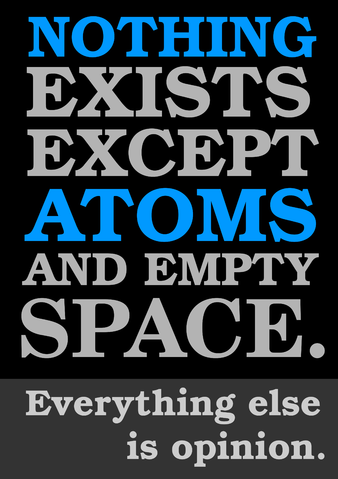

In [10]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

## 헤더 정보 세팅 

In [11]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key}
params = {'language': 'unk', 'detectOrientation':'true'}
data = {'url':image_url}

## 서비스를 요청하고 결과 확인 

In [12]:
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [13]:
analysis = response.json()

In [14]:
analysis

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '21,16,304,451',
   'lines': [{'boundingBox': '28,16,288,41',
     'words': [{'boundingBox': '28,16,288,41', 'text': 'NOTHING'}]},
    {'boundingBox': '27,66,283,52',
     'words': [{'boundingBox': '27,66,283,52', 'text': 'EXISTS'}]},
    {'boundingBox': '27,128,292,49',
     'words': [{'boundingBox': '27,128,292,49', 'text': 'EXCEPT'}]},
    {'boundingBox': '24,188,292,54',
     'words': [{'boundingBox': '24,188,292,54', 'text': 'ATOMS'}]},
    {'boundingBox': '22,253,297,32',
     'words': [{'boundingBox': '22,253,105,32', 'text': 'AND'},
      {'boundingBox': '144,253,175,32', 'text': 'EMPTY'}]},
    {'boundingBox': '21,298,304,60',
     'words': [{'boundingBox': '21,298,304,60', 'text': 'SPACE.'}]},
    {'boundingBox': '26,387,294,37',
     'words': [{'boundingBox': '26,387,210,37', 'text': 'Everything'},
      {'boundingBox': '249,389,71,27', 'text': 'else'}]},
    {'boundingBox': '127,431,198

In [16]:
line_infos = [region["lines"] for region in analysis['regions']]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '28,16,288,41', 'text': 'NOTHING'},
 {'boundingBox': '27,66,283,52', 'text': 'EXISTS'},
 {'boundingBox': '27,128,292,49', 'text': 'EXCEPT'},
 {'boundingBox': '24,188,292,54', 'text': 'ATOMS'},
 {'boundingBox': '22,253,105,32', 'text': 'AND'},
 {'boundingBox': '144,253,175,32', 'text': 'EMPTY'},
 {'boundingBox': '21,298,304,60', 'text': 'SPACE.'},
 {'boundingBox': '26,387,210,37', 'text': 'Everything'},
 {'boundingBox': '249,389,71,27', 'text': 'else'},
 {'boundingBox': '127,431,31,29', 'text': 'is'},
 {'boundingBox': '172,431,153,36', 'text': 'opinion.'}]

(-0.5, 337.5, 478.5, -0.5)

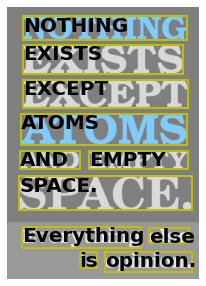

In [19]:
plt.figure(figsize=(5,5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
plt.axis('off')

## 한글 추출 

In [21]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"

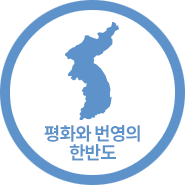

In [23]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [24]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key}
params = {'language': 'ko', 'detectOrientation':'true'}
data = {'url':image_url}

In [25]:
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [26]:
analysis = response.json()

In [27]:
analysis

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [28]:
line_infos = [region["lines"] for region in analysis['regions']]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '45,125,46,17', 'text': '평화와'},
 {'boundingBox': '95,125,45,17', 'text': '번영의'},
 {'boundingBox': '70,144,46,17', 'text': '한반도'}]